#Assignment 3.2: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [34]:
!pip install tensorflow --quiet

In [35]:
!pip install keras --quiet

In [36]:
#ENTER YOUR CODE HERE
import pandas as pd
df = pd.read_csv('/kaggle/input/new-dataset/new_dataset.csv')

In [37]:
print(df.shape)
print(df.columns)
df.head()

(10000, 2)
Index(['sentiment', 'text'], dtype='object')


,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...


**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [38]:
#ENTER YOUR CODE HERE

In [39]:
# remove stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,text
0,Negative,@xnausikaax oh no! u order from? that's horrible
1,Negative,A great hard training weekend over. couple day...
2,Negative,"Right, work Only 5 hours go I'm free xD"
3,Negative,I craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...


**Next, we'll remove some other info we dont need right now, like the handle names.**

In [40]:
#ENTER YOUR CODE HERE

In [41]:
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+', '', x))
df.head()

,sentiment,text
0,Negative,oh no! u order from? that's horrible
1,Negative,A great hard training weekend over. couple day...
2,Negative,"Right, work Only 5 hours go I'm free xD"
3,Negative,I craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...


**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [42]:
#ENTER YOUR CODE HERE
# do lemmatizaion
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head()

,sentiment,text
0,Negative,oh no! u order from? that' horribl
1,Negative,a great hard train weekend over. coupl day res...
2,Negative,"right, work onli 5 hour go i'm free xd"
3,Negative,i crave japanes food
4,Negative,jean michel jarr concert tomorrow gotta work 7...


**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

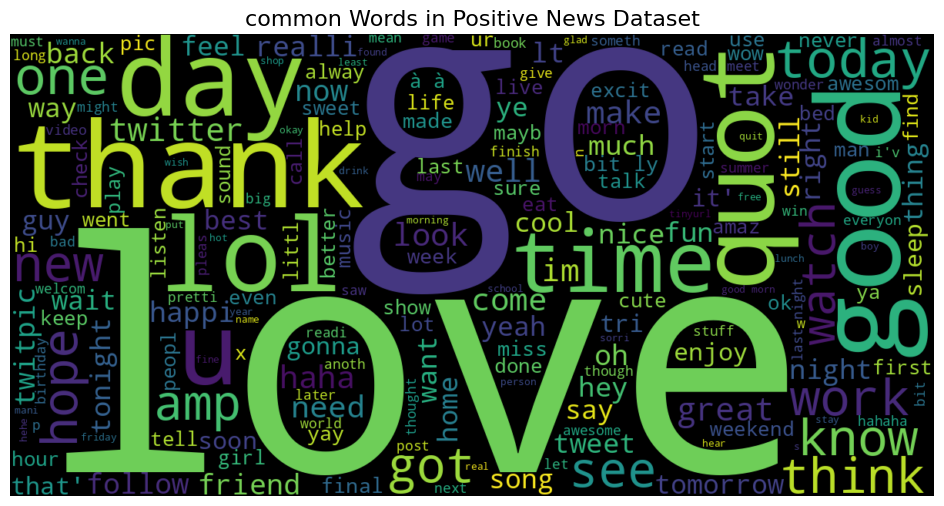

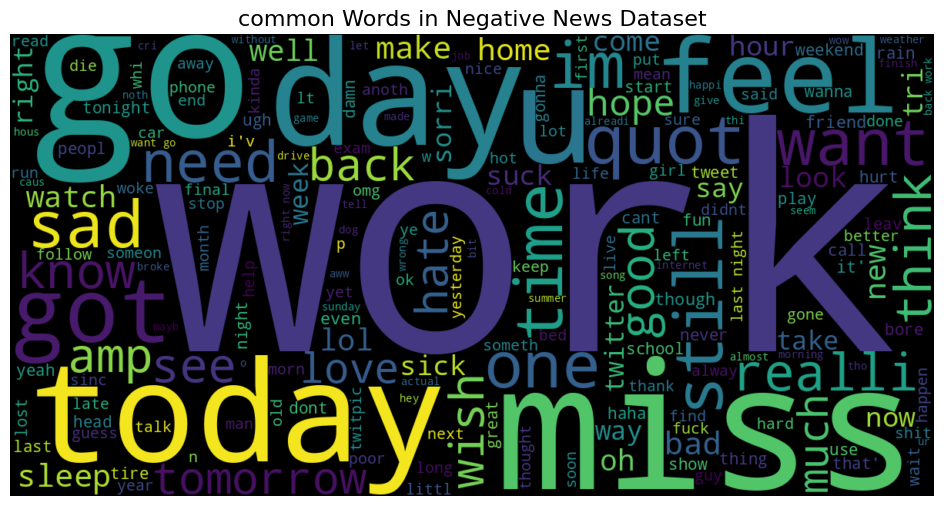

In [43]:
#ENTER YOUR CODE HERE
#generate a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
positive_text = df[df['sentiment'] == 'Positive']['text']
def plot_wordcloud(texts, title='Word Cloud'):
    all_text = ' '.join(texts)
    wc = WordCloud(width=1200, height=600, background_color='black').generate(all_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

plot_wordcloud(positive_text, title='common Words in Positive News Dataset')
negative_text = df[df['sentiment'] == 'Negative']['text']
plot_wordcloud(negative_text, title='common Words in Negative News Dataset')

In [44]:
#ENTER YOUR CODE HERE

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [45]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.1, random_state=42)
print(f"training set size:{len(X_train)}")
print(f"test set size:{len(X_test)}")

training set size:9000
test set size:1000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [46]:
#ENTER YOUR CODE HERE
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
vocab_size = len(tokenizer.word_index) + 1
print(f"vocab size:{vocab_size}")

2025-06-16 17:55:12.746853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750096513.009993      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750096513.082505      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


vocab size:13636


**Now transform the training and testing word sequences.**

In [47]:
#ENTER YOUR CODE HERE
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
print(f"training data:{X_train_sequences[0]}")
print(f"testing data:{X_test_sequences[0]}")

training data:[1, 31, 435, 8911, 828, 1182, 828, 19, 238, 7, 8912]
testing data:[318, 582, 1747, 1894, 146, 9]


**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [48]:
#ENTER YOUR CODE HERE
#pad the sequences so that each text sequence is of same length
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 36
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
print(f"Training Data:{X_train_sequences[0]}")
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
print(f"Testing Data:{X_test_sequences[0]}")

Training Data:[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1   31  435
 8911  828 1182  828   19  238    7 8912]
Testing Data:[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  318  582 1747 1894  146    9]


**Label encode y.**

In [49]:
#ENTER YOUR CODE HERE
#label encode y
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
print(f"training data:{y_train}")
print(f"testing data:{y_test}")

training data:[0 0 0 ... 1 0 1]
testing data:[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [58]:
import tensorflow as tf
import numpy as np
#!wget http://nlp.stanford.edu/data/glove.6B.zip
!curl -O http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   308  100   308    0     0   4720      0 --:--:-- --:--:-- --:--:--  4738


In [60]:
!ls /kaggle/input/new-dataset/

new_dataset.csv


In [52]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip -O /content/glove6B.zip
# !ls -lh /content/glove6B.zip
!rm -f /content/glove.6B.zip
# !curl -L -o /content/glove6B.zip http://nlp.stanford.edu/data/glove.6B.zip

In [61]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.6B.zip or
        glove.6B.zip.zip, and cannot find glove.6B.zip.ZIP, period.


In [55]:
!ls /content/

sample_data


In [56]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
vocab_size = 13636
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/glove.6B.300d.txt'

![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#ENTER YOUR CODE HERE

**Train the model on the train split, and validate it on the test split.**

In [ ]:
#ENTER YOUR CODE HERE

**Let's visualise the model's training history now.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
#ENTER YOUR CODE HERE

**Lets see what the accuracy of the model is.**

In [ ]:
#ENTER YOUR CODE HERE

**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [ ]:
#ENTER YOUR CODE HERE

In [ ]:
#ENTER YOUR CODE HERE

**We can try this on a random string as well.**

In [ ]:
input_str="I hate everyone on earth!"
#ENTER YOUR CODE HERE

## GOOD JOB!